In [3]:
import math
import time
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from pydub import AudioSegment
import librosa
import librosa.display
import os
import IPython.display as ipd
import matplotlib.pyplot as plot
from pydub import AudioSegment
import sounddevice as sd

V tejto časti importujeme potrebné knižnice

In [4]:
fn_wav = os.path.join('..', 'git','sounds', 'organ-C3.wav')
x, Fs = librosa.load(fn_wav, sr=None)
N=len(x)
Ts = 1/Fs
pi=math.pi

Tu sa načíta zvukový súbor a nastavujú sa parametre.

In [5]:
maxDelaySec = 5e-3
maxDelay = math.ceil(maxDelaySec*Fs)
zasobnik = np.zeros((maxDelay+1, 1)) 

Nastavenie velkosti zasobnika podla max. oneskorenia

In [6]:
fM = 5
modIndex = 0.5
offset = 1
basicDelaySec = 3e-3
basicDelay = math.ceil(basicDelaySec * Fs)
out = np.zeros((N,1))

Tu sú nastavené parametre pre moduláciu oscilátora a oneskorenie

In [7]:
for n in range(N):
    indexC =((n-1) % maxDelay) + 1
    zasobnik[indexC] = x[n]
    nfO = offset + modIndex * math.sin(2*math.pi*fM*(n-1)*Ts)
    mDelay = basicDelay * nfO
    fracDelay =((n-1 - mDelay) % maxDelay)+ 1
    intDelay = math.floor(fracDelay)
    nextSamp =(intDelay % maxDelay) + 1
    frac = fracDelay - intDelay
    out[n] = (1-frac) * zasobnik[intDelay] + (frac) * zasobnik[nextSamp]

Spracovanie signálu v tomto kóde cyklicky prechádza každú vstupnú vzorku signálu.

In [8]:
y = out.flatten()
D = librosa.stft(x)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

Tu sa uskutočňuje Fourierova transformácia a vizualizácia

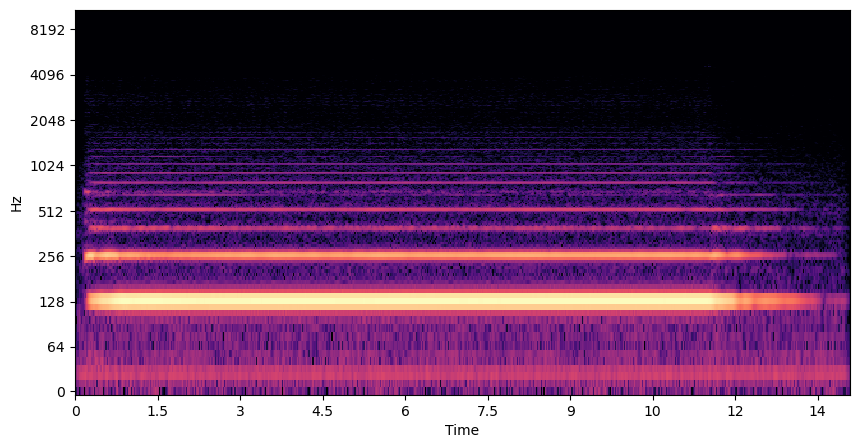

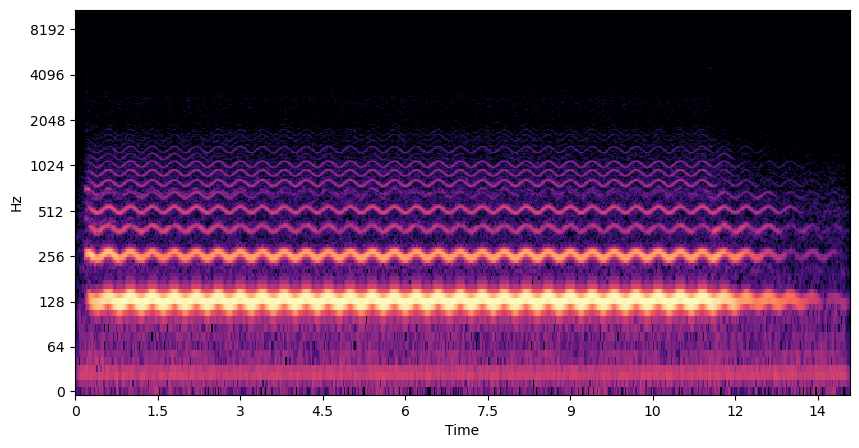

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)

D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)

Vibračný efekt sa dosahuje moduláciou oneskorenia vzoriek reprodukovaného signálu. Modulované oneskorenie vytvára efekt kmitania a zmeny frekvencie pôvodného signálu.

In [11]:
#Nacitanie file a vypocet trvalosti audia
sound = AudioSegment.from_file("../git/sounds/organ-C3.wav")
sound.duration_seconds == (len(sound) / 1000.0)
seconds_duration = round((sound.duration_seconds % 60),3)
                         
sd.play(x, Fs)
time.sleep(seconds_duration + 1)
sd.play(y, Fs)